# Pandas intro class 04

Objective:
- Understand and learn Exploratory Data Analysis
- Data visulization 101

There are many ways to do things using `pandas`, generally we want our work to be:
- simple
- explicit
- easy to read
- efficient

## EDA recommended steps
- inspect all datasets and metadata definition
- understand data types
- understand/ask the right question
- check for missing values, take appropriate action
- check for duplicates, take appropriate action
- check data distribution (outliers, anormaly values, check assumption, etc.)
- check correlation (with target variable, or multicolinearity in inputs)
- take care of outliers and generate transformations if needed
- data wrangling for your problem
- feature engineering
- visualization (along the way of all steps above)
### Advanced topics:
- sampling: random, up-sample, down-sample
- bi-variate / multi-variate views
- time series

## Recommended resourse: [Data EDA cheat-sheet](https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md)

### Another cheat-sheet in image format:
![img](https://www.analyticsvidhya.com/wp-content/uploads/2015/06/infographics-final.jpg)

## EDA example: World Happiness Data
https://www.kaggle.com/unsdsn/world-happiness

- Relatively smalle dataset for exploration
- Easy to explore with lots of flexibility
- Dystopis: https://worldhappiness.report/faq/#what-is-dystopia

In [ ]:
# install packages required in this class in your virtual env
! conda install matplotlib seaborn

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

%matplotlib inline

In [75]:
rename_dict = {'Overall rank':'Rank',
               'Happiness Rank':'Rank',
               'Happiness.Rank':'Rank',
               'Happiness Score':'Score',
               'Happiness.Score':'Score',
               'Country or region':'Country',
               'Economy..GDP.per.Capita.':'GDP_PC',
               'GDP per capita':'GDP_PC',
               'Economy (GDP per Capita)':'GDP_PC',
               'Social support':'Family',
               'Health (Life Expectancy)':'Health',
               'Healthy life expectancy':'Health',
               'Health..Life.Expectancy.':'Health',
               'Freedom to make life choices':'Freedom',
               'Trust (Government Corruption)':'Trust',
               'Trust..Government.Corruption.':'Trust',
               'Perceptions of corruption':'Trust',
               'Dystopia Residual':'Dystopia',
               'Dystopia.Residual':'Dystopia'
              }

In [76]:
# read in all different years of data
df_list = []

for year in range(2015, 2020):
    df = pd.read_csv(f'data/world-happiness/{year}.csv')
    # comment the following two lines for metadata inspection
    df.rename(columns=rename_dict, inplace=True)
    df['year'] = year
    df_list.append(df)

In [77]:
df_all = pd.concat(df_list)
df_all.sort_values(['Country','year'], inplace=True)
df_all.groupby('year')['Country'].count()

year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: Country, dtype: int64

In [79]:
df_all.head(10)

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015,NaN,NaN,NaN,NaN
153,Afghanistan,Southern Asia,154,3.360,NaN,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,2016,3.288,3.432,NaN,NaN
140,Afghanistan,NaN,141,3.794,NaN,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,2017,NaN,NaN,3.873661,3.714338
144,Afghanistan,NaN,145,3.632,NaN,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,2018,NaN,NaN,NaN,NaN
153,Afghanistan,NaN,154,3.203,NaN,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,2019,NaN,NaN,NaN,NaN
94,Albania,Central and Eastern Europe,95,4.959,0.05013,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940,2015,NaN,NaN,NaN,NaN
108,Albania,Central and Eastern Europe,109,4.655,NaN,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,1.928160,2016,4.546,4.764,NaN,NaN
108,Albania,NaN,109,4.644,NaN,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,1.490442,2017,NaN,NaN,4.752464,4.535536
111,Albania,NaN,112,4.586,NaN,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000,NaN,2018,NaN,NaN,NaN,NaN
106,Albania,NaN,107,4.719,NaN,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000,NaN,2019,NaN,NaN,NaN,NaN


In [80]:
df_2015 = pd.read_csv('data/world-happiness/2015.csv')
df_2016 = pd.read_csv('data/world-happiness/2016.csv')

In [85]:
# generate region mapping dict
region_2015 = dict(zip(df_2015['Country'], df_2015['Region']))
# region_dict2 = df[['Country','Region']].set_index('Country').T.to_dict('records')[0]
# region_2015 == region_dict2
region_2016 = dict(zip(df_2016['Country'], df_2016['Region']))
region = {**region_2015, **region_dict_2016}

In [90]:
# alternative way to combine dicts
region_dict2 = region_2015.copy()
region_dict2.update(region_2016)
region == region_dict2

True

In [91]:
# fill regions based on country
df_all['Region'] = df_all['Country'].map(region)

In [92]:
df_all[df_all['Region'].isna()]

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
119,Gambia,NaN,120,4.516,NaN,0.308000,0.939000,0.428000,0.382000,0.167000,0.269000,NaN,2019,NaN,NaN,NaN,NaN
70,"Hong Kong S.A.R., China",NaN,71,5.472,NaN,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,2017,NaN,NaN,5.549594,5.394406
83,North Macedonia,NaN,84,5.274,NaN,0.983000,1.294000,0.838000,0.345000,0.034000,0.185000,NaN,2019,NaN,NaN,NaN,NaN
57,Northern Cyprus,NaN,58,5.835,NaN,1.229000,1.211000,0.909000,0.495000,0.154000,0.179000,NaN,2018,NaN,NaN,NaN,NaN
63,Northern Cyprus,NaN,64,5.718,NaN,1.263000,1.252000,1.042000,0.417000,0.162000,0.191000,NaN,2019,NaN,NaN,NaN,NaN
32,Taiwan Province of China,NaN,33,6.422,NaN,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,2017,NaN,NaN,6.494596,6.349404
37,Trinidad & Tobago,NaN,38,6.192,NaN,1.223000,1.492000,0.564000,0.575000,0.019000,0.171000,NaN,2018,NaN,NaN,NaN,NaN
38,Trinidad & Tobago,NaN,39,6.192,NaN,1.231000,1.477000,0.713000,0.489000,0.016000,0.185000,NaN,2019,NaN,NaN,NaN,NaN


In [97]:
cols_to_keep = ['Country', 'Region', 'year', 'Rank', 'Score', 'GDP_PC', 'Family', 'Freedom', 'Trust', 'Generosity', 'Dystopia']
df_all_final = df_all[cols_to_keep].copy()
df_all_final.columns = df_all_final.columns.str.lower()
df_all_final.to_csv('data/world-happiness/combined.csv', index=False)

In [103]:
df_all_final[df_all_final['country'].isin(['China','United States'])]

,country,region,year,rank,score,gdp_pc,family,freedom,trust,generosity,dystopia
83,China,Eastern Asia,2015,84,5.140,0.890120,0.946750,0.516970,0.027810,0.081850,1.860400
82,China,Eastern Asia,2016,83,5.245,1.027800,0.793810,0.440120,0.027450,0.049590,2.170870
78,China,Eastern Asia,2017,79,5.273,1.081166,1.160837,0.472788,0.022794,0.028807,1.764939
85,China,Eastern Asia,2018,86,5.246,0.989000,1.142000,0.597000,0.103000,0.029000,NaN
92,China,Eastern Asia,2019,93,5.191,1.029000,1.125000,0.521000,0.100000,0.058000,NaN
14,United States,North America,2015,15,7.119,1.394510,1.247110,0.546040,0.158900,0.401050,2.510110
12,United States,North America,2016,13,7.104,1.507960,1.047820,0.481630,0.148680,0.410770,2.727820
13,United States,North America,2017,14,6.993,1.546259,1.419921,0.505741,0.135639,0.392579,2.218113
17,United States,North America,2018,18,6.886,1.398000,1.471000,0.547000,0.133000,0.291000,NaN
18,United States,North America,2019,19,6.892,1.433000,1.457000,0.454000,0.128000,0.280000,NaN


In [111]:
df_all_final.groupby('country').agg(['first', 'last']).stack()

region  year  rank  score  \
country                                                                 
Afghanistan first                    Southern Asia  2015   153  3.575   
            last                     Southern Asia  2019   154  3.203   
Albania     first       Central and Eastern Europe  2015    95  4.959   
            last        Central and Eastern Europe  2019   107  4.719   
Algeria     first  Middle East and Northern Africa  2015    68  5.605   
...                                            ...   ...   ...    ...   
Yemen       last   Middle East and Northern Africa  2019   151  3.380   
Zambia      first               Sub-Saharan Africa  2015    85  5.129   
            last                Sub-Saharan Africa  2019   138  4.107   
Zimbabwe    first               Sub-Saharan Africa  2015   115  4.610   
            last                Sub-Saharan Africa  2019   146  3.663   

                    gdp_pc   family  freedom    trust  generosity  dystopia  
country                                                                      
Afghanistan first  0.31982  0.30285  0.23414  0.09719     0.36510  1.952100  
            last   0.35000  0.51700  0.00000  0.02500     0.15800  2.150801  
Albania     first  0.87867  0.80434  0.35733  0.06413     0.14272  1.898940  
            last   0.94700  0.84800  0.38300  0.02700     0.17800  1.490442  
Algeria     first  0.93929  1.07772  0.28579  0.17383     0.07822  2.432090  
...                    ...      ...      ...      ...         ...       ...  
Yemen       last   0.28700  1.16300  0.14300  0.07700     0.10800  1.345601  
Zambia      first  0.47038  0.91612  0.48827  0.12468     0.19591  2.634300  
            last   0.57800  1.05800  0.43100  0.08700     0.24700  1.826705  
Zimbabwe    first  0.27100  1.03276  0.25861  0.08079     0.18987  2.441910  
            last   0.36600  1.11400  0.36100  0.08900     0.15100  1.597970  

[340 rows x 10 columns]

In [144]:
rank_change = pd.DataFrame(df_all_final.groupby('country')['rank'].nth(0) - df_all_final.groupby('country')['rank'].nth(-1))

In [145]:
rank_change.loc[rank_change['rank'].idxmin()]

rank   -85
Name: Venezuela, dtype: int64

In [146]:
rank_change.loc[rank_change['rank'].idxmax()]

rank    53
Name: Benin, dtype: int64

(array([ 1.,  0.,  2.,  3., 19., 39., 64., 26., 12.,  4.]),
 array([-85. , -71.2, -57.4, -43.6, -29.8, -16. ,  -2.2,  11.6,  25.4,
         39.2,  53. ]),
 <a list of 10 Patch objects>)

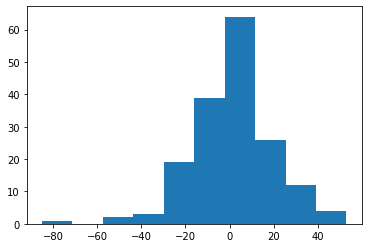

In [148]:
plt.hist(rank_change['rank'])